In [22]:
# Initial imports
import os
import requests
import pandas as pd


%matplotlib inline
from matplotlib import pyplot as plt

In [23]:
pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [27]:
pip install pycoingecko

Note: you may need to restart the kernel to use updated packages.


In [28]:
#python3.10 -m pip install pycoingecko
from pycoingecko import CoinGeckoAPI

In [29]:
#install matplotlib.pylot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [30]:
coingecko = CoinGeckoAPI()

In [31]:
def get_data(cryptocurrency):
    cryptocurrency_data = coingecko.get_coin_by_id(cryptocurrency, market_data='true', sparkline='true')
    df = pd.DataFrame.from_dict(cryptocurrency_data, orient='index')
    df.to_csv(r'cryptocurrency_data.csv')
    return df

In [32]:
get_data('bitcoin')

,0
id,bitcoin
symbol,btc
name,Bitcoin
asset_platform_id,None
platforms,{'': ''}
block_time_in_minutes,10
hashing_algorithm,SHA-256
categories,[Cryptocurrency]
public_notice,None
additional_notices,[]


In [33]:
get_data('ethereum')

,0
id,ethereum
symbol,eth
name,Ethereum
asset_platform_id,None
platforms,"{'': '', 'kardiachain': '0x1540020a94aa8bc189a..."
block_time_in_minutes,0
hashing_algorithm,Ethash
categories,[Smart Contract Platform]
public_notice,None
additional_notices,[]


In [34]:
def get_historical_data(cryptocurrency, fiat_currency, number_of_days):
    historic_price = coingecko.get_coin_market_chart_by_id(cryptocurrency, fiat_currency, number_of_days)
    prices = [price[1] for price in historic_price['prices']]
    return prices

In [35]:

print(get_historical_data('bitcoin', 'USD', 5))

[46981.664000279, 47102.92390881105, 47062.68943837382, 47029.81194456035, 47225.995364420975, 47503.7562114244, 47238.06788109148, 47290.00625222793, 46891.233939562626, 46755.24757658214, 46535.57748297065, 46728.74918128138, 46548.370425069, 46393.98638742354, 45966.43984703932, 46155.15631143342, 46280.98326476368, 46531.140860530526, 46235.884365682046, 46135.91582075914, 46206.74797556233, 46457.5611752291, 46109.14600772337, 46194.244879141836, 46465.75216608625, 46660.94899372711, 46491.7299974738, 46379.43752784, 46889.481956170144, 46803.15078633856, 46591.722409635506, 47057.02449635822, 47507.693656884665, 47066.565769064786, 46904.77628067637, 46664.62988762414, 45794.698823411105, 45998.57774647676, 46346.54389040857, 46294.00598439383, 46164.78138780403, 45938.02427172366, 46309.780484451265, 46243.70671169548, 46370.15671395653, 46519.15292800913, 46405.09737517141, 46368.51184567423, 46520.72301190721, 46442.61044066538, 46718.281511878595, 46928.9216580707, 46807.3345

In [36]:
bitcoin = get_historical_data('bitcoin', 'USD', 30)

In [37]:
bt_df = pd.DataFrame(bitcoin, columns = ['Bitcoin Value'])
bt_df.index.name = 'Every Hour Count in the Past 30 Days'
bt_df.to_csv(r'Bitcoin.csv')
df = pd.read_csv("Bitcoin.csv")

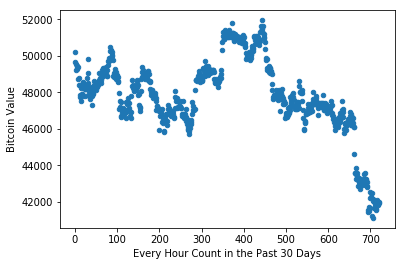

In [38]:
df.plot(x = 'Every Hour Count in the Past 30 Days', y = 'Bitcoin Value', kind = 'scatter')
plt.xlabel('Every Hour Count in the Past 30 Days')
plt.ylabel('Bitcoin Value')
plt.show()

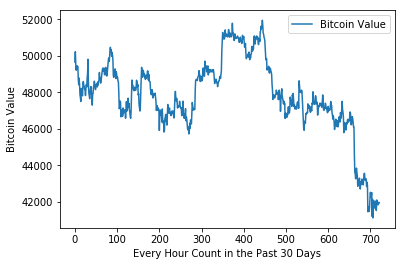

In [39]:
df.plot(x = 'Every Hour Count in the Past 30 Days', y = 'Bitcoin Value', kind = 'line')
plt.xlabel('Every Hour Count in the Past 30 Days')
plt.ylabel('Bitcoin Value')
plt.show()

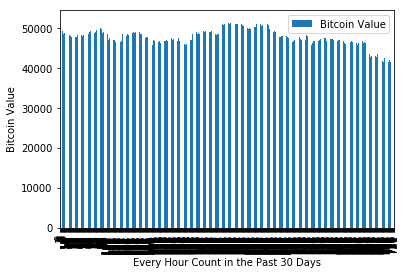

In [40]:
df.plot(x = 'Every Hour Count in the Past 30 Days', y = 'Bitcoin Value', kind = 'bar')
plt.xlabel('Every Hour Count in the Past 30 Days')
plt.ylabel('Bitcoin Value')
plt.show()
